In [65]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import debug


In [66]:
# Configure image
image = cv2.imread("../images/boards/red_white_angled.jpeg")
image_size = (700,700)
image = cv2.resize(image,image_size)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


Detect chessboard borders

In [67]:
canny = cv2.Canny(gray, threshold1=1150, threshold2=200) 
lines = cv2.HoughLines(canny,rho = 1, theta = np.pi / 180, threshold = 200)
lines = lines.reshape(len(lines),2)
lines = lines[lines[:, 0].argsort()]

HIGH_VALUE = 500
while(len(lines) > 4):
    
    less_diff = HIGH_VALUE
    
    for i in range(len(lines)-1):
        
        difference = lines[i + 1][0] - lines[i][0]
        if  difference < less_diff:
            less_diff = difference
            duplicate = i
            
    lines = np.delete(lines, duplicate, axis=0)

def polar_to_coor(lines):
    
    coor_lines = []
    for line in lines:
        rho,theta = line
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 +1000 *(-b))
        y1 = int(y0 +1000*(a))
        x2 = int(x0 -1000*(-b))
        y2 = int(y0 -1000*(a))   
        coor_lines.append(((x1,y1),(x2,y2)))
    
    return coor_lines
    
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       return None

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y    

inter = []
lines = polar_to_coor(lines)

for i in range(len(lines)):
    for j in range(i + 1, len(lines)):
        inter.append(line_intersection(lines[i], lines[j]))
        

#debug.lines(image, lines, size = 7)
debug.points(image,inter,color = (0,255,0),size = 10)
print(inter)


[(556.4008760427507, 43.778589732887816), (347.5752804401418, -638.7419893990578), (707.0896201311468, 536.2860746850474), (165.24506285964432, 43.58291398842403), (28050.75, 57.53264132066033), (30.41947038645667, 548.1337261313026)]


Trim image

In [68]:
vertices = np.array([(100, 100), (400, 100), (200, 300), (300, 300)], np.int32)

# Crear una máscara vacía
mascara = np.zeros_like(image)

# Llenar la máscara con el trapecio
cv2.fillPoly(mascara, [vertices], (255, 255, 255))

# Aplicar la máscara a la imagen original
imagen_recortada = cv2.bitwise_and(image, mascara)

# Mostrar la imagen original y la imagen recortada


Detect inner corners

In [69]:
max_corners = 100
corners = cv2.goodFeaturesToTrack(gray, max_corners, qualityLevel= 0.07, minDistance= 15)
corners = np.intp(corners)
actual_size = corners.shape[0], corners.shape[2]
corners = corners.reshape(actual_size)

#debug.points(image,corners)

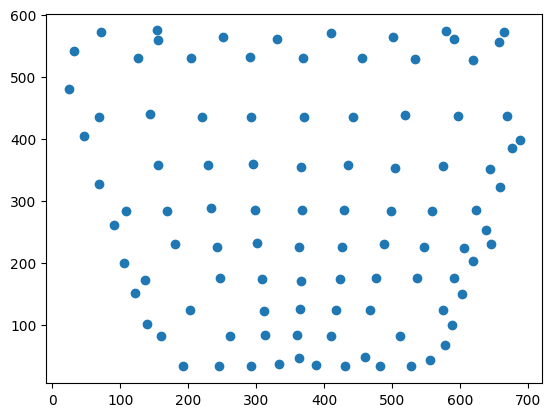

In [70]:
plt.scatter(corners[:,0], corners[:,1])

In [71]:
cv2.imshow('Imagen Original', image)
cv2.imshow('canny', canny)
cv2.imshow('Imagen Recortada', imagen_recortada)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [72]:


print (line_intersection(([1,1], [3,4]), ([1,3], [3,0])))

(1.6666666666666667, 2.0)
